


# Modeling Life Expectancy

## Background
The Global Health Observatory (GHO) data repository under the World Health Organization (WHO) tracks health status and other related factors for all countries. This dataset is related to life expectancy and associated health factors for 193 countries, aggregated from the WHO, and corresponding economic data was collected from the United Nation website. This data spans the years of 2000 to 2015. 


Explore the Data

In [ ]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

# read in the data
df = pd.read_csv("Life Expectancy Data.csv")

# explore the data
df.head()
df.tail()
df.columns
df.describe()
df.shape

(2938, 22)

Clean the Data

In [ ]:
# focus on the most recent data (subset for 2015 data)
df = df[df["Year"] == 2015]

# remove countries with small populations as potential outliers
df = df[df["Population"] >= 100000]
print(df.shape)
print(df.columns)

# rename column names with weird spacing
df.rename(columns = {' BMI ':'BMI'}, inplace = True)
df.rename(columns = {'Life expectancy ':'life_expectancy'}, inplace = True)

# Select BMI, GDP, Schooling, and Status for variables of interest, along with Life Expectency for Response variable
df = df[["BMI", "GDP", "Schooling", "Status", "life_expectancy"]]
print(df.shape)

(125, 22)
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
(125, 5)


Run Linear Regression

In [ ]:
results = smf.ols('life_expectancy ~ Schooling + Status', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     140.8
Date:                Fri, 30 Sep 2022   Prob (F-statistic):           2.00e-32
Time:                        04:36:02   Log-Likelihood:                -368.74
No. Observations:                 125   AIC:                             743.5
Df Residuals:                     122   BIC:                             752.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               46.4496      3.003     15.466      0.000      40.504      52.395
Status[T.Developing]    -2.8345      1.357     -2.088      0.039      -5.522      -0.147
Schooling                2.0909      0.171     12.256      0.000       1.753       2.429
==============================================================================
Omnibus:                        9.272   Durbin-Watson:                   2.377
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.342
Skew:                          -0.659   Prob(JB):                      0.00936
Kurtosis:                       3.243   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Check the Residuals

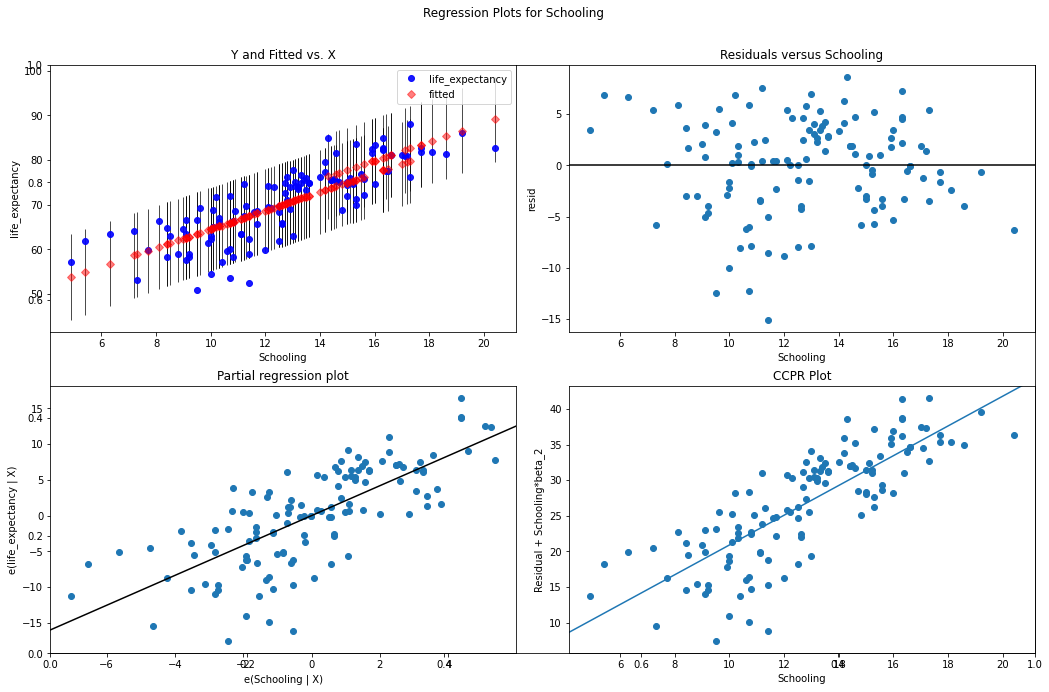

In [ ]:
# display the residuals to consider regression assumptions
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results, 'Schooling', fig=fig)
plt.show()

Make Adjustments to Better Meet Conditions

In [ ]:
# run the regression again, but take the square root of life expectancy to improve homoscedasity
results = smf.ols('np.log(life_expectancy) ~ Schooling + Status', data=df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(life_expectancy)   R-squared:                       0.671
Model:                                 OLS   Adj. R-squared:                  0.666
Method:                      Least Squares   F-statistic:                     124.5
Date:                     Fri, 30 Sep 2022   Prob (F-statistic):           3.42e-30
Time:                             04:36:08   Log-Likelihood:                 155.17
No. Observations:                      125   AIC:                            -304.3
Df Residuals:                          122   BIC:                            -295.9
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.8890      0.045     85.604      0.000       3.799       3.979
Status[T.Developing]    -0.0313      0.021     -1.525      0.130      -0.072       0.009
Schooling                0.0305      0.003     11.821      0.000       0.025       0.036
==============================================================================
Omnibus:                       18.699   Durbin-Watson:                   2.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.145
Skew:                          -0.912   Prob(JB):                     1.55e-05
Kurtosis:                       3.960   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

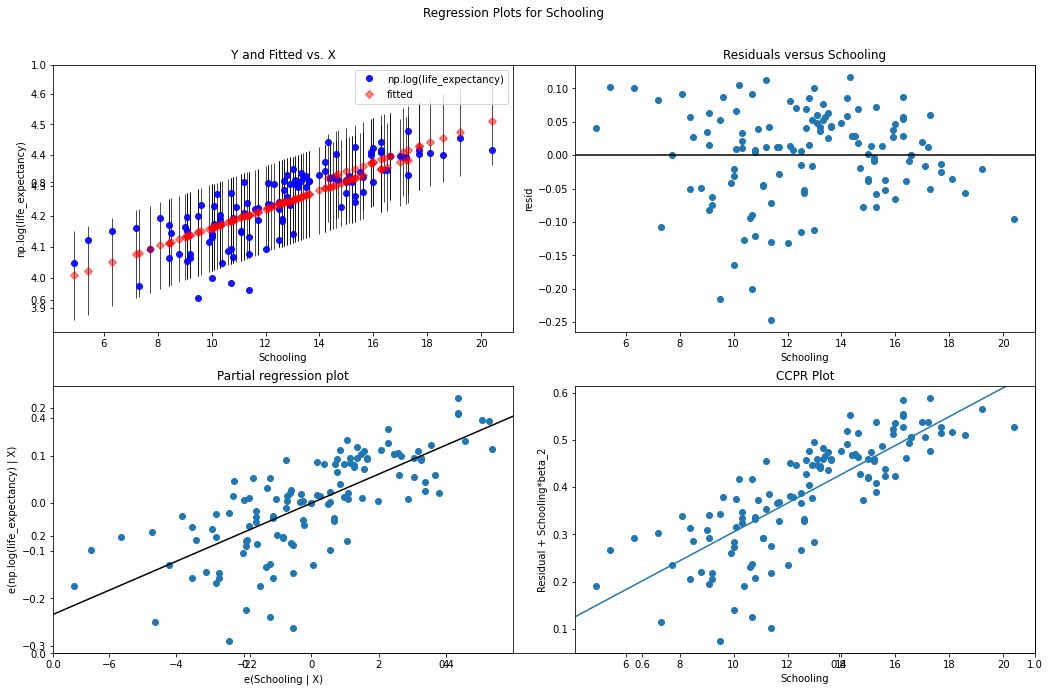

In [ ]:
# display the updated residuals
fig, ax = plt.subplots(figsize=(15,10))
sm.graphics.plot_regress_exog(results, 'Schooling', fig=fig)
plt.show()

In [ ]:
# display the output of the final regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(life_expectancy)   R-squared:                       0.671
Model:                                 OLS   Adj. R-squared:                  0.666
Method:                      Least Squares   F-statistic:                     124.5
Date:                     Fri, 30 Sep 2022   Prob (F-statistic):           3.42e-30
Time:                             04:36:14   Log-Likelihood:                 155.17
No. Observations:                      125   AIC:                            -304.3
Df Residuals:                          122   BIC:                            -295.9
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.8890      0.045     85.604      0.000       3.799       3.979
Status[T.Developing]    -0.0313      0.021     -1.525      0.130      -0.072       0.009
Schooling                0.0305      0.003     11.821      0.000       0.025       0.036
==============================================================================
Omnibus:                       18.699   Durbin-Watson:                   2.386
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.145
Skew:                          -0.912   Prob(JB):                     1.55e-05
Kurtosis:                       3.960   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpret the Results

With a large F-statistic of 124.5 and significant p-values, developing/developed status and level of schooling appear to have an impact on the log(life expectancy). 66.6% of the variation in the log(life expecatancy) can be explained by its relationship with developing/developed status and level of schooling.

For every unit increase in schooling, we would expect an increase in the log(life expectancy) of 0.0305, while holding developing/developed status fixed. In more readable terms, this means that each unit increase in schooling will result in an expected increased life expectency of 3.1%. 

Living in a developing country will result in an expected decrease in the log(life expectancy) of 0.0313 while holding level of schooling constant. In more readable terms, this means that someone living in a developing country will have an expected life expectancy 96.918% as long as someone living in a developed country. For example, someone living in a developed country with a life expectancy of 70 would have a life expectancy of about 67.84 years if the country were developing, with level of schooling held constant.